## Author: Tanmoy Bhowmik

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [29]:
def gauss(x,A,mean,sig):
    '''
    Returns a Gaussian Profile
    '''
    gaussian = (A / (sig * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * sig ** 2))
    return gaussian

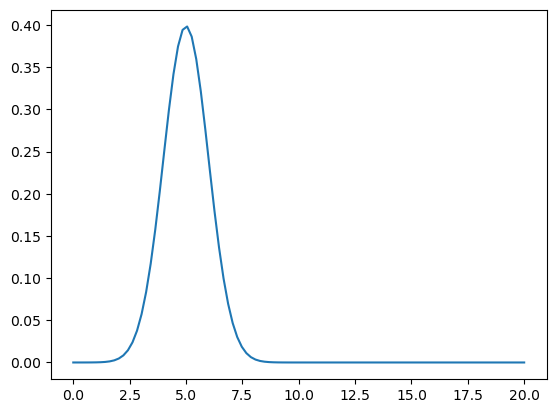

In [31]:
x_test = np.linspace(0,20,100)
gauss_test = gauss(x_test, 1.0, 5, 1.0)
plt.plot(x_test, gauss_test)
plt.show()

In [47]:
def nonlinear_func_real(x_vals, amp1, amp2, ml, m2, w1, cont):
    '''
Combines two gaussians into one simulated model spectrum
'''
    return gauss(x_vals, amp1,  ml,w1) + gauss(x_vals, amp2, m2, w1) + cont

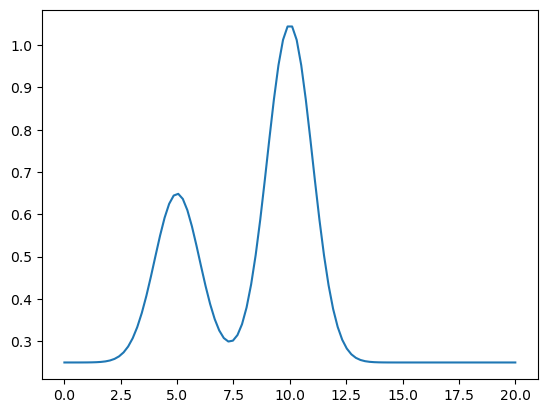

In [49]:
x_test2 = np.linspace(0,20,100)
y_val_test = nonlinear_func_real(x_test2, 1.0, 2.0, 5, 10, 1.0, 0.25)
plt.plot(x_test2, y_val_test)
plt.show()

In [97]:
def fit_data(wave, spec, amp1, amp2, m1, m2, w1, cont):
    '''
    Fits 2 Gaussian profiles to a spectrum to determine the amplitudes, 
    line centers, widths, and continuum level of the input spectrum.
    
    Parameters:
    wave (array): Wavelength values.
    spec (array): Spectrum intensity values.
    amp1 (float): Initial guess for amplitude of first Gaussian.
    amp2 (float): Initial guess for amplitude of second Gaussian.
    m1 (float): Initial guess for mean of first Gaussian.
    m2 (float): Initial guess for mean of second Gaussian.
    w1 (float): Initial guess for width of both Gaussians.
    cont (float): Initial guess for continuum level.

    Returns:
    popt (array): Best-fitting parameters.
    pcov (array): Covariance matrix.
    '''
    
    print('====================')
    print('Performing a least squares fit...')

    # Perform curve fitting
    popt, pcov = curve_fit(nonlinear_func_real, wave, spec, p0=[amp1, amp2, m1, m2, w1, cont])
    
    # Calculate errors
    errs = np.sqrt(np.diag(pcov))

    # Display results
    print('===================')
    print('Printing out the best fitting parameters and 1 std errors....')
    print('----------------')
    print(f'Line 1 Amp: {popt[0]:.4f}  Amp_err: {errs[0]:.4f}')
    print(f'Line 2 Amp: {popt[1]:.4f}  Amp_err: {errs[1]:.4f}')
    print(f'Line 1 Wavelength: {popt[2]:.4f}  Mean_4959_err: {errs[2]:.4f}')
    print(f'Line 2 Wavelength: {popt[3]:.4f}  Mean_5007_err: {errs[3]:.4f}')
    print(f'Line Width: {popt[4]:.4f}  Sigma_err: {errs[4]:.4f}')
    print(f'Continuum Level: {popt[5]:.4f}  Cont_err: {errs[5]:.4f}')
    print('===================')
    print('Plotting the observed and modeled data....')

    # Compute the model fit
    y_model = nonlinear_func_real(wave, *popt)

    # Plot data and fit
    plt.plot(wave, spec, label='Data')
    plt.plot(wave, y_model, label='Model', linestyle='--')
    plt.vlines(popt[2], ymin=0.0, ymax=max(spec), linestyles='--', alpha=0.75, linewidth=1.00)
    plt.vlines(popt[3], ymin=0.0, ymax=max(spec), linestyles='--', alpha=0.75, linewidth=1.00)
    plt.legend()
    plt.show()

    return popt, pcov

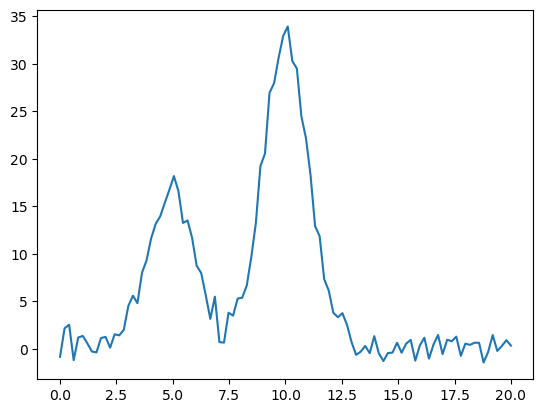

In [99]:
wave_test = np.linspace(0, 20, 100)
pure_model = nonlinear_func_real(wave_test, 20.0, 40.0, 5, 10, 1, 0.25)
func_test_ = pure_model + np.random.normal(loc= pure_model, size= len(pure_model))
plt.plot(wave_test, func_test_)
plt.show()

Performing a least squares fit...
Printing out the best fitting parameters and 1 std errors....
----------------
Line 1 Amp: 41.5757  Amp_err: 1.0931
Line 2 Amp: 81.5010  Amp_err: 1.2595
Line 1 Wavelength: 4.9370  Mean_4959_err: 0.0292
Line 2 Wavelength: 10.0086  Mean_5007_err: 0.0149
Line Width: 1.0078  Sigma_err: 0.0145
Continuum Level: 0.3587  Cont_err: 0.1411
Plotting the observed and modeled data....


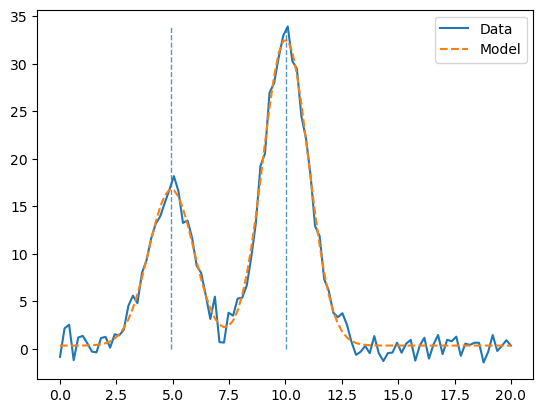

In [101]:
out_popt, out_pcov = fit_data(wave_test, func_test_, 18, 33, 4.5, 9.5, 1.5, 0.5)

In [103]:
def get_redshift(lamo, lame):
    '''
     return to redshift of a source given the observed and rest frame wavelengths.
     '''
    return (lamo-lame)/lame

In [105]:
get_redshift(5007, 5007)

0.0